Accuracy: 0.9186
AUC-ROC: 0.9533
MCC: 0.7813

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.76      0.83      2655
           1       0.92      0.97      0.95      7603

    accuracy                           0.92     10258
   macro avg       0.91      0.87      0.89     10258
weighted avg       0.92      0.92      0.92     10258



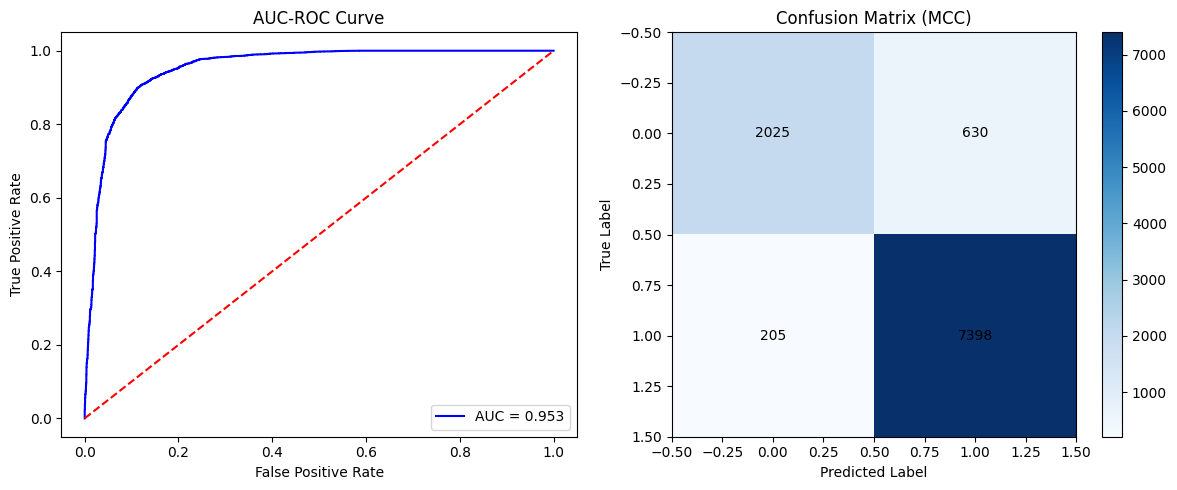

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, classification_report, roc_auc_score, roc_curve, 
    matthews_corrcoef, confusion_matrix
)

# Load dataset
df = pd.read_csv("superstore.csv")  # Adjust file path


# Creating a binary target variable (1 = Profitable, 0 = Not Profitable)
df['Profit_Binary'] = (df['Profit'] > 0).astype(int)

# Dropping irrelevant columns
columns_to_drop = ['Customer.ID', 'Customer.Name', 'Order.ID', 'Order.Date', 
                   'Product.ID', 'Product.Name', 'Ship.Date', 'City', 'Country', 'State']

df = df.drop(columns=columns_to_drop, errors='ignore')

# Convert categorical features into numerical using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Define features (X) and target variable (y)
X = df.drop(columns=['Profit', 'Profit_Binary'], errors='ignore')  # Drop original profit column
y = df['Profit_Binary']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train LASSO Logistic Regression Model
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', C=0.1)
lasso_model.fit(X_train, y_train)

# Predictions
y_pred = lasso_model.predict(X_test)
y_pred_proba = lasso_model.predict_proba(X_test)[:, 1]

# Calculate Metrics
accuracy = accuracy_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_proba)
mcc = matthews_corrcoef(y_test, y_pred)

# Print Metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")
print(f"MCC: {mcc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --- Visualization: AUC-ROC Curve ---
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(12, 5))

# Plot AUC-ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', label=f"AUC = {auc_roc:.3f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='red')  # Diagonal Line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Curve")
plt.legend()

# --- Visualization: MCC Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)

plt.subplot(1, 2, 2)
plt.imshow(cm, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (MCC)")
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black')

plt.tight_layout()
plt.show()


In [9]:
import joblib

joblib.dump(lasso_model, 'logistic_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(X.columns.tolist(), 'feature_columns.pkl')


['feature_columns.pkl']